In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [33]:
x_m=1
omega=1

def position(t):
    return x_m*np.sin(omega*t)

def velocity(t):
    return x_m*omega*np.cos(omega*t)
def force(k,x):
    return -k*x

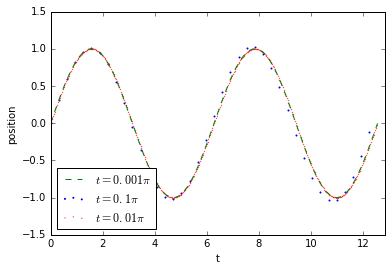

In [34]:
def midpoint(x_0,t_0,t_f,v_0,step_size,m,k):
    t_step=np.arange(t_0,t_f,step_size)
    position=np.zeros(len(t_step))
    velocity=np.zeros(len(t_step))
    position[0]=x_0
    velocity[0]=v_0
    i=0
    while(i<len(t_step)-1):
        #midpoint values
        position_mid=position[i]+velocity[i]*(step_size/2)
        velocity_mid=velocity[i]+force(k,position[i])*(step_size/2)
        accel_mid=force(k,position_mid)/m
        #print(position_mid,velocity_mid,accel_mid)
        #actual values
        position[i+1]=position[i]+velocity_mid*step_size
        velocity[i+1]=velocity[i]+accel_mid*step_size
        i+=1
    return t_step,position,velocity,i 

midpoint_result1=midpoint(0,0,4*np.pi,1,0.1*np.pi,1,1) 
midpoint_result2=midpoint(0,0,4*np.pi,1,0.01*np.pi,1,1) 
midpoint_result3=midpoint(0,0,4*np.pi,1,0.001*np.pi,1,1) 
#print(midpoint_result)
plt.scatter(midpoint_result1[0],midpoint_result1[1],color='b',s=1,label='$t=0.1\pi$')
plt.scatter(midpoint_result2[0],midpoint_result2[1],color='r',s=0.1,label='$t=0.01\pi$')
plt.plot(midpoint_result3[0],midpoint_result3[1],'g--',label='$t=0.001\pi$')
plt.legend(loc='lower left')
plt.xlabel('t')
plt.ylabel('position')
plt.xlim(min(midpoint_result1[0]),1.05*max(midpoint_result1[0]))
plt.savefig('ica4_1.png')
plt.show()

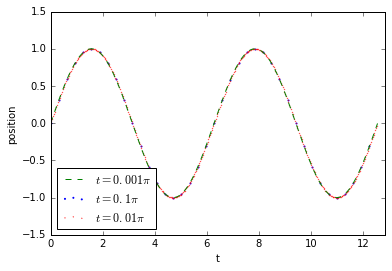

In [35]:
def runge_kutta(x_0,t_0,t_f,v_0,step_size,m,k):
    t_step=np.arange(t_0,t_f,step_size)
    position=np.zeros(len(t_step))
    velocity=np.zeros(len(t_step))
    position[0]=x_0
    velocity[0]=v_0
    i=0
    while(i<len(t_step)-1):
        x1=position[i]
        v1=velocity[i]
        a1=force(k,x1)
        
        x2=position[i]+v1*(step_size/2)
        v2=velocity[i]+a1*(step_size/2)
        a2=force(k,x2)
        
        x3=position[i]+v2*(step_size/2)
        v3=velocity[i]+a2*(step_size/2)
        a3=force(k,x3)
        
        x4=position[i]+v3*step_size
        v4=velocity[i]+a3*step_size
        a4=force(k,x4)
        
        position[i+1]=position[i]+(step_size/6)*(v1+2*v2+2*v3+v4)
        velocity[i+1]=velocity[i]+(step_size/6)*(a1+2*a2+2*a3+a4)
        i+=1
    return t_step,position,velocity,i
runge_kutta_result1=runge_kutta(0,0,4*np.pi,1,0.1*np.pi,1,1)  
runge_kutta_result2=runge_kutta(0,0,4*np.pi,1,0.01*np.pi,1,1) 
runge_kutta_result3=runge_kutta(0,0,4*np.pi,1,0.001*np.pi,1,1) 

plt.scatter(runge_kutta_result1[0],runge_kutta_result1[1],color='b',s=1,label='$t=0.1\pi$')
plt.scatter(runge_kutta_result2[0],runge_kutta_result2[1],color='r',s=0.1,label='$t=0.01\pi$')
plt.plot(midpoint_result3[0],midpoint_result3[1],'g--',label='$t=0.001\pi$')
plt.legend(loc='lower left')
plt.xlabel('t')
plt.ylabel('position')
plt.xlim(min(midpoint_result1[0]),1.05*max(midpoint_result1[0]))
plt.savefig('ica4_2.png')
plt.show()


In [36]:
def Euler(x_0,t_0,t_f,v_0,step_size,m,k):
    t_step=np.arange(t_0,t_f,step_size)
    position=np.zeros(len(t_step))
    velocity=np.zeros(len(t_step))
    position[0]=x_0
    velocity[0]=v_0
    i=0
    while(i<len(t_step)-1):
        velocity[i+1] = velocity[i]-(k/m)*position[i]*step_size
        position[i+1] = position[i] + velocity[i]*step_size
        i+=1
    return t_step,position,velocity,i
    
t_1=Euler(0,0,4*np.pi,1,0.1*np.pi,1,1)
t_2=Euler(0,0,4*np.pi,1,0.01*np.pi,1,1)
t_3=Euler(0,0,4*np.pi,1,0.001*np.pi,1,1)

In [37]:
##Energy conservation
def Energy(x,v,k,m):
    return (1/2)*(k*x**2+m*v**2)
E_1=Energy(midpoint_result1[1],midpoint_result1[2],1,1)
E_2=Energy(midpoint_result2[1],midpoint_result2[2],1,1)
E_3=Energy(midpoint_result3[1],midpoint_result3[2],1,1)
E_4=Energy(runge_kutta_result1[1],runge_kutta_result1[2],1,1)
E_5=Energy(runge_kutta_result2[1],runge_kutta_result2[2],1,1)
E_6=Energy(runge_kutta_result3[1],runge_kutta_result3[2],1,1)
E_7=Energy(t_1[1],t_1[2],1,1)
E_8=Energy(t_2[1],t_2[2],1,1)
E_9=Energy(t_3[1],t_3[2],1,1)


def E_err(E,E0):
    return np.abs(E-E0)/E0

E_1_err=E_err(E_1[len(E_1)-1],E_1[0])
E_2_err=E_err(E_2[len(E_2)-1],E_2[0])
E_3_err=E_err(E_3[len(E_3)-1],E_3[0])
E_4_err=E_err(E_4[len(E_4)-1],E_4[0])
E_5_err=E_err(E_5[len(E_5)-1],E_5[0])
E_6_err=E_err(E_6[len(E_6)-1],E_6[0])
E_7_err=E_err(E_7[len(E_4)-1],E_7[0])
E_8_err=E_err(E_8[len(E_5)-1],E_8[0])
E_9_err=E_err(E_9[len(E_6)-1],E_9[0])


midpoint_err=[E_1_err,E_2_err,E_3_err]
runge_kutta_err=[E_4_err,E_5_err,E_6_err]
Euler_E_err=[E_7_err,E_8_err,E_9_err]
t_step=[0.1*np.pi,0.01*np.pi,0.001*np.pi]

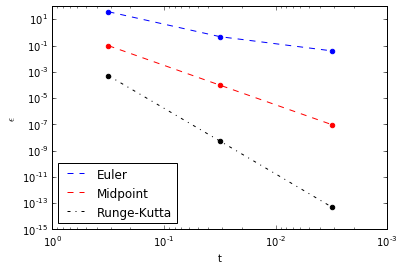

In [38]:
plt.scatter(t_step,Euler_E_err,color='blue')
plt.plot(t_step,Euler_E_err,'b--',label='Euler')
plt.scatter(t_step,midpoint_err,color='red')
plt.scatter(t_step,runge_kutta_err,color='black')
plt.plot(t_step,midpoint_err,'r--',label='Midpoint')
plt.plot(t_step,runge_kutta_err,'k-.',label='Runge-Kutta')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('$\epsilon$')
plt.legend(loc='best')
plt.xlim(1,1e-3)
plt.ylim(1e-15,1e2)
plt.savefig('ica4_c.png')
plt.show()

In [66]:
###Error Performace
midpoint_test=midpoint(0,0,4*np.pi,1,0.001*np.pi,1,1)
runge_kutta_test=runge_kutta(0,0,4*np.pi,1,0.003*np.pi,1,1) 
E_test=Euler(0,0,4*np.pi,1,0.0001*np.pi,1,1)

E_mid_test=Energy(midpoint_test[1],midpoint_test[2],1,1)
E_rung_test=Energy(runge_kutta_test[1],runge_kutta_test[2],1,1)
E_euler_test=Energy(E_test[1],E_test[2],1,1)

E_mid_err=E_err(E_mid_test[len(E_mid_test)-1],E_mid_test)
E_rung_err=E_err(E_rung_test[len(E_rung_test)-1],E_rung_test)
E_euler_err=E_err(E_euler_test[len(E_rung_test)-1],E_euler_test)

print(np.average(E_mid_err)*100,midpoint_test[3],midpoint_test[3]*11)
print(np.average(E_rung_err)*100,runge_kutta_test[3],runge_kutta_test[3]*31)
print(np.average(E_euler_err)*100,E_test[3],E_test[3]*4)

4.86923700959e-06 3999 43989
6.48968002445e-10 1333 41323
0.184435318442 39999 159996
